# Sentiment Analysis

## Προεπεξεργασία και καθάρισμα δεδομένων
First, we are cleaning the *train2017.tsv* and *test2017.tsv* files and saving them as * *_cleaned.tsv*.
More specifically, we are:
* lower-casing the tweets
* removing symbols (Hashtags, etc.)
* removing emojis and unknown characters
* deleting completely the mentions(@) and url's.
* removing stop-words
* applying stemming to all of the remaining words

In [1]:
import string
import csv
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

def stemming(w):
    ps = PorterStemmer()
    return ps.stem(w)

def cleaning(s, stem_flag=1):
    s = re.sub(r"(?:\@|http)\S+", "", s) #removing urls and mentions
    s = s.lower() #lowercase the current tweet
    for char in string.punctuation:
        s = s.replace(char, ' ')
    cleared_string = ""
    word_tokens = word_tokenize(s) 
    for word in word_tokens:
        if word not in stopwords.words('english') and all(ord(char) < 128 for char in word):
                if stem_flag:
                    cleared_string += stemming(word) #not for wordclouds
                else:
                    cleared_string += word
                cleared_string += ' '
    return cleared_string

print("Cleaning train2017.tsv...")
with open('../twitter_data/train2017.tsv') as input_file, open('../twitter_data/train2017_cleaned.tsv', 'w') as output_file:
    reader = csv.reader(input_file, delimiter='\t')
    for row in reader:
        cleaned_tweet = cleaning(row[3])
        output_file.write(row[0] + '\t' + row[1] + '\t' + row[2] + '\t' + cleaned_tweet + '\n')
print("Done. Saved as train2017_cleaned.tsv\n")

print("Cleaning test2017.tsv...")
with open('../twitter_data/test2017.tsv') as input_file, open('../twitter_data/test2017_cleaned.tsv', 'w') as output_file:
    reader = csv.reader(input_file, delimiter='\t')
    for row in reader:
        cleaned_tweet = cleaning(row[3])
        output_file.write(row[0] + '\t' + row[1] + '\t' + row[2] + '\t' + cleaned_tweet + '\n')
print("Done. Saved as test2017_cleaned.tsv\n")

Cleaning train2017.tsv...
Done. Saved as train2017_cleaned.tsv

Cleaning test2017.tsv...
Done. Saved as test2017_cleaned.tsv



## Ανάλυση των δεδομένων
We are showing (for the *train2017_cleaned.tsv*) the
* most common words in the whole dataset
* most common words in the whole dataset for negative, positive and neutral tweets, respectively.

Also, we are showing some graphs on some information we found interesting.

In [ ]:
all_tweets = []
pos_tweets = []
neg_tweets = []
neu_tweets = []
labels = []
with open('../twitter_data/train2017.tsv') as input_file:
    reader = csv.reader(input_file, delimiter='\t')
    for row in reader:
        cleaned_tweet = cleaning(row[3], 0)
        all_tweets.append(cleaned_tweet)
        if row[2] == "positive":
            pos_tweets.append(cleaned_tweet)
        elif row[2] == "negative":
            neg_tweets.append(cleaned_tweet)
        else: #if neutral
            neu_tweets.append(cleaned_tweet)

### Wordclouds

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wc(x, name):
    curr_wc = WordCloud( background_color = 'white', stopwords = stopwords.words('english'), min_font_size = 10).generate(x)
    plt.figure(figsize = [8, 8])
    plt.imshow(curr_wc, interpolation="bilinear")
    plt.axis("off")
    name = 'wordclouds/' + name + '.png'
    plt.savefig(name, format="png")

print("Generating WordClouds...")
generate_wc((" ").join(all_tweets), "all_tweets_wordcloud")
generate_wc((" ").join(pos_tweets), "pos_tweets_wordcloud")
generate_wc((" ").join(neg_tweets), "neg_tweets_wordcloud")
generate_wc((" ").join(neu_tweets), "neu_tweets_wordcloud")
print("Done. Saved in scr/wordclouds/.\n")    

Generating WordClouds...
Done. Saved in scr/wordclouds/.



### Graphs


#### Most common positive/negative words in positive/negative tweets

Generating Graphs...
Done.



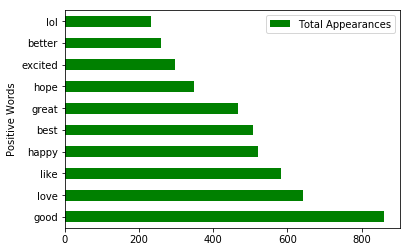

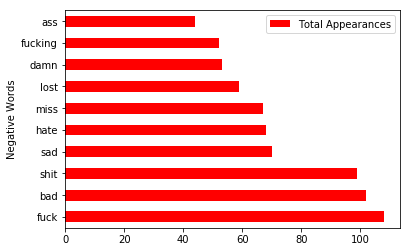

In [7]:
from nltk.tokenize import word_tokenize
import collections
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

print("Generating Graphs...")

def generate_graph(curr_list, curr_type):
    wordcount = {}
    for tweet in curr_list:
        tweet_tokens = word_tokenize(tweet)
        for word in tweet_tokens:
            with open('../lexica/affin/affin.txt') as input_file:
                reader = csv.reader(input_file, delimiter='\t')
                for row in reader:
                    if(row[0][0]>word[0]):
                        break
                    if(row[0] == word):
                        if(curr_type == "positive"):
                            if(int(row[1])>=2):
                                if word not in wordcount:
                                    wordcount[word] = 1
                                else:
                                    wordcount[word] += 1
                        else: #elif(curr_type = "negative"):
                            if(int(row[1])<=-2):
                                if word not in wordcount:
                                    wordcount[word] = 1
                                else:
                                    wordcount[word] += 1
                        break
    return wordcount

word_counter = collections.Counter(generate_graph(pos_tweets, "positive"))
lst = word_counter.most_common(10)
df = pd.DataFrame(lst, columns = ['Positive Words', 'Total Appearances'])
df.plot.barh(x='Positive Words',y='Total Appearances', color='green')

word_counter = collections.Counter(generate_graph(neg_tweets, "negative"))
lst = word_counter.most_common(10)
df = pd.DataFrame(lst, columns = ['Negative Words', 'Total Appearances'])
df.plot.barh(x='Negative Words',y='Total Appearances', color='red')

print("Done.\n") 

#### Most common mentions in all the tweets for positive & negative reasons

Generating Graphs...
Done.



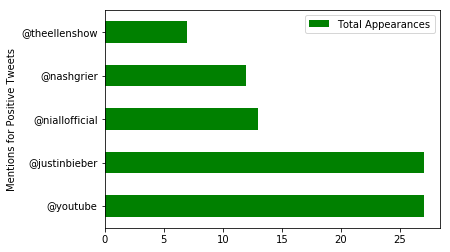

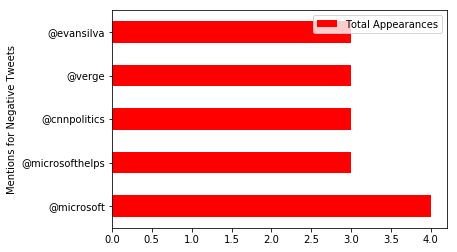

In [8]:
print("Generating Graphs...")

mentions_list = {}
with open('../twitter_data/train2017.tsv') as input_file:
    reader = csv.reader(input_file, delimiter='\t')
    for row in reader:
        row[3] = row[3].replace('@ ', '@-')
        flag = 0
        word_tokens = word_tokenize(row[3]) 
        for word in word_tokens:
            word = word.lower()
            if flag:
                if word.isalpha():
                    word = "@"+word
                    if(word not in mentions_list):
                        if(row[2]=="positive"):
                            mentions_list[word] = 1
                        elif(row[2]=="negative"):
                            mentions_list[word] = -1
                    else:
                        if(row[2]=="positive"):
                            mentions_list[word] += 1
                        elif(row[2]=="negative"):
                            mentions_list[word] -= 1
                flag = 0
            elif(word=="@"):
                flag = 1

best_mentions_dict = {}
worst_mentions_dict = {}
for key in mentions_list:
    if(mentions_list[key]>0):
        best_mentions_dict[key] = mentions_list[key]
    if(mentions_list[key]<0):
        worst_mentions_dict[key] = mentions_list[key]*(-1)
                
best_mentions = collections.Counter(best_mentions_dict).most_common()
worst_mentions = collections.Counter(worst_mentions_dict).most_common()

num_of_items = 5

df = pd.DataFrame(best_mentions[:num_of_items], columns = ['Mentions for Positive Tweets', 'Total Appearances'])
df.plot.barh(x='Mentions for Positive Tweets',y='Total Appearances', color='green')

df = pd.DataFrame(worst_mentions[:num_of_items], columns = ['Mentions for Negative Tweets', 'Total Appearances'])
df.plot.barh(x='Mentions for Negative Tweets',y='Total Appearances', color='red')

print("Done.\n") 

## Vectorization - εξαγωγή χαρακτηριστικών
Getting the features of each tweet using the methods of:
* Bag-of-words
* Tf_idf
* word embeddings

In [9]:
train_tweets = []
labels = []
with open('../twitter_data/train2017_cleaned.tsv') as input_file:
    reader = csv.reader(input_file, delimiter='\t')
    for row in reader:
        labels.append(row[2])
        train_tweets.append(row[3])

test_tweets = []
with open('../twitter_data/test2017_cleaned.tsv') as input_file:
    reader = csv.reader(input_file, delimiter='\t')
    for row in reader:
        test_tweets.append(row[3])

### Bag-of-words

In [10]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer

#for train2017_cleaned.tsv
bow_vectorizer = CountVectorizer()
bow_xtrain = bow_vectorizer.fit_transform(train_tweets)    
#bow_xtrain = bow_vectorizer.fit_transform(train_tweets[:3])    
#print(bow_xtrain.shape)
#print(vectorizer.get_feature_names())
#print(bow_xtrain.toarray())
output = open('pickles/bow_xtrain.pkl', 'wb')
pickle.dump(bow_xtrain, output)
output.close()
print("pickles/bow_xtrain.pkl saved successfully.")

#for test2017_cleaned.tsv
bow_vectorizer = CountVectorizer()
bow_xtest = bow_vectorizer.fit_transform(test_tweets)    
#bow_xtest = bow_vectorizer.fit_transform(test_tweets[:3])    
#print(bow_xtest.shape)
#print(vectorizer.get_feature_names())
#print(bow_xtest.toarray())
output = open('pickles/bow_xtest.pkl', 'wb')
pickle.dump(bow_xtest, output)
output.close()
print("pickles/bow_xtest.pkl saved successfully.")

pickles/bow_xtrain.pkl saved successfully.
pickles/bow_xtest.pkl saved successfully.


### Tf_idf

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

#for train2017_cleaned.tsv
tfidf_vectorizer = TfidfVectorizer()
tfdif_xtrain = tfidf_vectorizer.fit_transform(train_tweets)
#print(tfdif_xtrain.shape)
output = open('pickles/tfdif_xtrain.pkl', 'wb')
pickle.dump(tfdif_xtrain, output)
output.close()
print("pickles/tfdif_xtrain.pkl saved successfully.")

#for test2017_cleaned.tsv
tfidf_vectorizer = TfidfVectorizer()
tfdif_xtest = tfidf_vectorizer.fit_transform(test_tweets)
#print(tfdif_xtest.shape)
output = open('pickles/tfdif_xtest.pkl', 'wb')
pickle.dump(tfdif_xtest, output)
output.close()
print("pickles/tfdif_xtest.pkl saved successfully.")

pickles/tfdif_xtrain.pkl saved successfully.
pickles/tfdif_xtest.pkl saved successfully.


### word embeddings

In [ ]:
#code here

## Προσθήκη χαρακτηριστικών στο διάνυσμα λέξης

In [ ]:
#code here

## Δοκιμάζουμε Ταξινομήτες

* SVM
* KNN

We are using the above learning models with the features we got from BOW, TFID, word embeddings and lexica-values.

In [12]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

#we are inserting to a list the right answers for the tweets
answers = []
with open('../twitter_data/SemEval2017_task4_subtaskA_test_english_gold.txt') as input_file:
    reader = csv.reader(input_file, delimiter='\t')
    for row in reader:
        answers.append(row[1])

#we are running the validation for total_features
#NOTE: later we are going to use train_test_split() function
total_features = 2000

### SVM | Bag-of-words

In [13]:
bow_vectorizer = CountVectorizer(max_features = total_features)
bow_xtrain = bow_vectorizer.fit_transform(train_tweets[:total_features])
bow_xtest = bow_vectorizer.fit_transform(test_tweets[:total_features])

svc = svm.SVC(kernel='linear', C=1, probability=True)
svc = svc.fit(bow_xtrain, labels[:total_features])
y_pred = svc.predict(bow_xtest)
      
accuracy = f1_score(answers[:total_features], y_pred, average='macro')
print("SVM | Bag-of-words: {0:.0%} accuracy for".format(accuracy), total_features, "features")

SVM | Bag-of-words: 33% accuracy for 2000 features


### SVM | Tf_idf

In [14]:
tfidf_vectorizer = TfidfVectorizer(max_features = total_features)
tfdif_xtrain = tfidf_vectorizer.fit_transform(train_tweets[:total_features])
tfdif_xtest = tfidf_vectorizer.fit_transform(test_tweets[:total_features])

svc = svm.SVC(kernel='linear', C=1, probability=True)
svc = svc.fit(tfdif_xtrain, labels[:total_features])
y_pred = svc.predict(tfdif_xtest)
      
accuracy = f1_score(answers[:total_features], y_pred, average='macro')
print("SVM | Tf_idf: {0:.0%} accuracy for".format(accuracy), total_features, "features")

SVM | Tf_idf: 32% accuracy for 2000 features


### KNN | Bag-of-words

In [15]:
tfidf_vectorizer = TfidfVectorizer(max_features = total_features)
tfdif_xtrain = tfidf_vectorizer.fit_transform(train_tweets[:total_features])
tfdif_xtest = tfidf_vectorizer.fit_transform(test_tweets[:total_features])

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(bow_xtrain, labels[:total_features])
y_pred = knn.predict(bow_xtest)
      
accuracy = f1_score(answers[:total_features], y_pred, average='macro')
print("KNN | Bag-of-words: {0:.0%} accuracy for".format(accuracy), total_features, "features")

KNN | Bag-of-words: 27% accuracy for 2000 features


### KNN | Tf_idf

In [16]:
tfidf_vectorizer = TfidfVectorizer(max_features = total_features)
tfdif_xtrain = tfidf_vectorizer.fit_transform(train_tweets[:total_features])
tfdif_xtest = tfidf_vectorizer.fit_transform(test_tweets[:total_features])

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(tfdif_xtrain, labels[:total_features])
y_pred = knn.predict(tfdif_xtest)
      
accuracy = f1_score(answers[:total_features], y_pred, average='macro')
print("KNN | Tf_idf: {0:.0%} accuracy for".format(accuracy), total_features, "features")

KNN | Tf_idf: 33% accuracy for 2000 features
